Analizzo: /Users/marcodonatiello/PycharmProjects/JupyterProject/data/processed/encoded/train_encoded.csv

--- 📊 STATISTICHE NUMDAYS ---
count    536370.000000
mean         29.818758
std          86.857485
min           0.000000
25%           0.000000
50%           1.000000
75%           8.000000
max         999.000000
Name: NUMDAYS, dtype: float64

Asimmetria (Skewness): 4.50
⚠️ ATTENZIONE: Ci sono valori > 365. La coda è molto lunga.


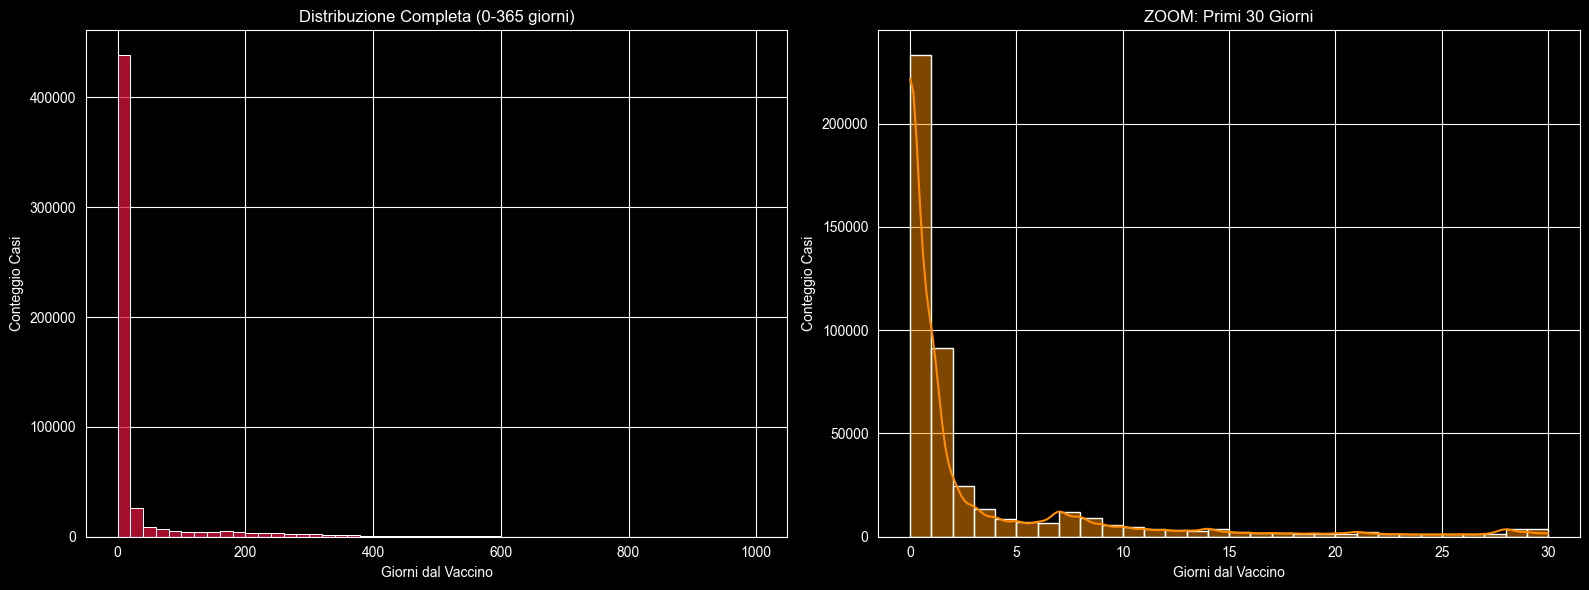

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- 1. CONFIGURAZIONE PERCORSI ---
CURRENT_DIR = os.getcwd()
if os.path.basename(CURRENT_DIR) in ["02_feature_engineering", "notebooks", "src"]:
    BASE_DIR = os.path.dirname(CURRENT_DIR)
else:
    BASE_DIR = CURRENT_DIR

DATA_DIR = os.path.join(BASE_DIR, 'dataset')
FILE_PATH = os.path.join(DATA_DIR, 'train_encoded.csv') # Usiamo il file pulito

print(f"Analizzo: {FILE_PATH}")
df = pd.read_csv(FILE_PATH)

# --- 2. STATISTICHE ---
print("\n--- 📊 STATISTICHE NUMDAYS ---")
desc = df['NUMDAYS'].describe()
print(desc)

skew = df['NUMDAYS'].skew()
print(f"\nAsimmetria (Skewness): {skew:.2f}")

# Verifica pulizia
if df['NUMDAYS'].min() < 0:
    print("⚠️ ATTENZIONE: Ci sono ancora giorni negativi! Esegui lo script di pulizia.")
elif df['NUMDAYS'].max() > 365:
    print("⚠️ ATTENZIONE: Ci sono valori > 365. La coda è molto lunga.")
else:
    print("✅ I dati sembrano puliti (tra 0 e 365).")

# --- 3. GRAFICI ---
plt.figure(figsize=(16, 6))

# A. Distribuzione Completa
plt.subplot(1, 2, 1)
sns.histplot(df['NUMDAYS'], bins=50, kde=False, color='crimson')
plt.title('Distribuzione Completa (0-365 giorni)')
plt.xlabel('Giorni dal Vaccino')
plt.ylabel('Conteggio Casi')

# B. Zoom sui primi 30 Giorni (La zona critica)
plt.subplot(1, 2, 2)
# Filtriamo solo per il grafico
df_zoom = df[df['NUMDAYS'] <= 30]
sns.histplot(df_zoom['NUMDAYS'], bins=30, kde=True, color='darkorange')
plt.title('ZOOM: Primi 30 Giorni')
plt.xlabel('Giorni dal Vaccino')
plt.ylabel('Conteggio Casi')

plt.tight_layout()
plt.show()